![A Cloud Guru](acg_logo.png)
<hr/>

<center><h1>Perform Feature Engineering Using Amazon SageMaker</h1></center>

# Introduction

In this lab, you will learn how to perform various preprocessing tasks like encoding, scaling and data binning. The provided dataset contains a list of employees with their job title, age, salary and the department and contains both numerical and text data.

# How to Use This Lab

Most of the code is provided for you in this lab as our solution to the tasks presented. Some of the cells are left empty with a #TODO header and its your turn to fill in the empty code. You can always use our lab guide if you are stuck.

# 1) Import the Libraries

In [1]:
import numpy as np
import pandas as pd
#Required for encoding purposes
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

#Required for scaling purposes
from sklearn.preprocessing import MinMaxScaler

#Required for binning purposes
from sklearn.preprocessing import KBinsDiscretizer

# Required for plaotting charts
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


# 2)Read the data

In [2]:
# TODO: Read the "Employee_encoding.csv" file and display the first few rows.
employee_df = pd.read_csv('Employee_encoding.csv')
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title
0,1,John,Doe,35,Male,Marketing,50000,developer
1,2,Jane,Smith,28,Female,Sales,60000,senior developer
2,3,Michael,Johnson,42,Male,Finance,70000,manager
3,4,Emily,Williams,31,Female,HR,55000,vp
4,5,James,Brown,37,Male,Operations,65000,developer


# 3) Encoding Techniques

<h1> 3.1) Ordinal Encoding </h1>

In [3]:
# Initialize the oridnal encoder and perform fit operation
ordinal_encoder = OrdinalEncoder()
ordinal_encoder.fit(employee_df['title'].values.reshape(-1,1))
ordinal_encoder.categories_

[array(['developer', 'manager', 'senior developer', 'vp'], dtype=object)]

In [4]:
ordinal_encoder.categories_ = [['developer','senior developer','manager','vp']]

In [5]:
# TODO: Transform the title feature and assign the results to a new feature named "encoded_title" and print the top few rows.
# Ensure the new feature contains encoded values.
employee_df['encoded_title'] = ordinal_encoder.transform(employee_df['title'].values.reshape(-1,1))
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0
4,5,James,Brown,37,Male,Operations,65000,developer,0.0


# 3.2) One-hot Encoding

In [6]:
gender_encoder = OneHotEncoder()

In [7]:
# TODO: Apply the encoder's "fit_transform" on the "gender" feature
transform = gender_encoder.fit_transform(employee_df['gender'].values.reshape(-1,1))

In [8]:
employee_df1 = pd.DataFrame(transform.todense(), columns=gender_encoder.categories_)
employee_df = employee_df.join(employee_df1)
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)"
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0


# 3.3) Label Encoding

In [9]:
# TODO: Initialize "LabelEncoder" and assign it to a variable "department_encoder"
department_encoder = LabelEncoder()

In [10]:
employee_df['encoded_department'] = department_encoder.fit_transform(employee_df['department'])
department_encoder.classes_

array(['Finance', 'HR', 'IT', 'Marketing', 'Operations', 'Sales'],
      dtype=object)

In [11]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)",encoded_department
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0,3
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0,5
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0,0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0,1
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0,4


# 4) Scaling Techniques

In [13]:
# We will scale the salary feature using MinMaxScaler

mmscaler = MinMaxScaler(clip=True)
mmscaler.fit(employee_df['salary'].values.reshape(-1,1))
employee_df['salary_minmax_scaled'] = mmscaler.transform(employee_df['salary'].values.reshape(-1,1))

In [14]:
# TODO: Invoke "describe" function on the new feature 'salary_minmax_scaled'.
# ensure the minimum value is 0 and the maximum value is 1
employee_df[['salary_minmax_scaled']].describe()

,salary_minmax_scaled
count,100.000000
mean,0.388537
std,0.229024
min,0.000000
25%,0.219512
50%,0.347561
75%,0.521341
max,1.000000


In [15]:
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)",encoded_department,salary_minmax_scaled
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0,3,0.000000
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0,5,0.121951
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0,0,0.243902
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0,1,0.060976
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0,4,0.182927


# 5) Binning Techniques

In [16]:
# TODO: Initialize "KBinsDiscretizer" with 10 bins, setting the strategy to "quantile" and encode to "ordinal" 
kbins = KBinsDiscretizer(n_bins=10, strategy='quantile', encode='ordinal')

In [17]:
employee_df['age_bin'] = kbins.fit_transform(employee_df['age'].values.reshape(-1,1))
employee_df.head()

,employee_id,first_name,last_name,age,gender,department,salary,title,encoded_title,"(Female,)","(Male,)",encoded_department,salary_minmax_scaled,age_bin
0,1,John,Doe,35,Male,Marketing,50000,developer,0.0,0.0,1.0,3,0.000000,7.0
1,2,Jane,Smith,28,Female,Sales,60000,senior developer,1.0,1.0,0.0,5,0.121951,2.0
2,3,Michael,Johnson,42,Male,Finance,70000,manager,2.0,0.0,1.0,0,0.243902,9.0
3,4,Emily,Williams,31,Female,HR,55000,vp,3.0,1.0,0.0,1,0.060976,4.0
4,5,James,Brown,37,Male,Operations,65000,developer,0.0,0.0,1.0,4,0.182927,9.0


(array([ 8.,  5.,  9., 15., 13.,  4., 11., 15.,  8., 12.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

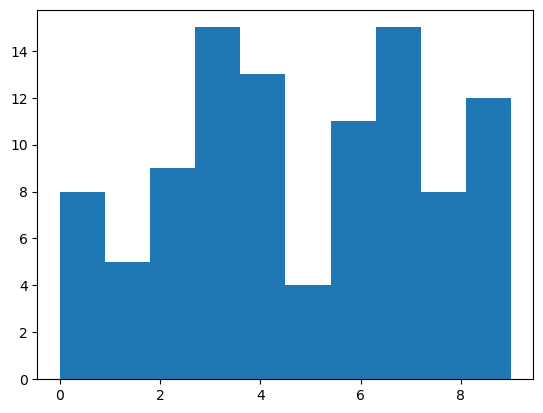

In [18]:
# Lets visualize it by platting a chart

plt.hist(employee_df['age_bin'])